<a href="https://colab.research.google.com/github/zulfiqaralimir/Yield-Curve-and-ETF-Analysis/blob/master/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Yield Curve Modelling**

###**Gather Yields**
We’ve already retrieved U.S. Treasury yields (from FRED via Fred API) for maturities including 6‑month, 1‑year, 2‑year, 3‑year, 5‑year, 7‑year, 10‑year, 20‑year, 30‑year — covering your timeframe 2020‑2025.

##**Key Concepts in Project**
###**Risk-Free Interest Rates**

**What they are:** U.S. Treasury yields are considered "risk-free" because the U.S. government is unlikely to default.

**Why it matters:** These rates are the baseline for nearly all asset pricing.

**Where we used this:**
Used as the benchmark in the Yield Curve Analysis (Task 2) and Yield Curve Modeling (Task 3)

##**🔍 Credit Risk**
**Definition: **Risk that a borrower (like a company) won’t pay back its debt.

In contrast to Treasuries when discussing **corporate bonds** and spreads in Yield Curve Analysis, Credit Reisk is discussed.



##**💰 Credit Spread**
The extra yield investors demand over the risk-free rate to hold a risky bond.

**Formula**:

```
Credit Spread = Corporate Bond Yield - Treasury Yield (same maturity)
```

##**Volatility of U.S. Treasury Yields**
- How much Treasury yields change over time.

- It affects:

 - Bond prices

 - Portfolio values

 - Financial models and risk

#**Fit the Nelson–Siegel Model**


**FRED API with fredapi**

In [ ]:
!pip install fredapi

In [ ]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# Initializing the FRED API
fred = Fred(api_key='0749ccdf18180b136b399a83bcf1bced')

# List of Treasury yield series IDs
series_ids = ['DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', 'DGS7', 'DGS10', 'DGS20', 'DGS30']

#series_ids = ['DGS10']

# Function to get data for a single series
def get_yield_data(series_id):
    data = fred.get_series(series_id, observation_start="2020-01-01", observation_end="2025-07-01")
    return data

# Get data for all series
yields_dict = {series_id: get_yield_data(series_id) for series_id in series_ids}

# Combine into a single DataFrame
yields = pd.DataFrame(yields_dict)

# Rename columns for clarity
yields.columns = ['6 Month', '1 Year', '2 Year', '3 Year', '5 Year', '7 Year', '10 Year', '20 Year', '30 Year']

In [ ]:
yields.index = pd.to_datetime(yields.index)
yields.loc['2021-01-05']

,2021-01-05
6 Month,0.09
1 Year,0.10
2 Year,0.13
3 Year,0.17
5 Year,0.38
7 Year,0.66
10 Year,0.96
20 Year,1.49
30 Year,1.70


Above shows all CMT Yields at specific data, as percentage.

In [ ]:
yields.isna().sum(axis = 0)

,0
6 Month,60
1 Year,60
2 Year,60
3 Year,60
5 Year,60
7 Year,60
10 Year,60
20 Year,60
30 Year,60


It shows missing data. It can be attributed to holidays or market irregularites.

In [ ]:
yields.head()

,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,1.57,1.56,1.58,1.59,1.67,1.79,1.88,2.19,2.33
2020-01-03,1.55,1.55,1.53,1.54,1.59,1.71,1.80,2.11,2.26
2020-01-06,1.56,1.54,1.54,1.56,1.61,1.72,1.81,2.13,2.28
2020-01-07,1.56,1.53,1.54,1.55,1.62,1.74,1.83,2.16,2.31


**Plot a sample yield curve:**

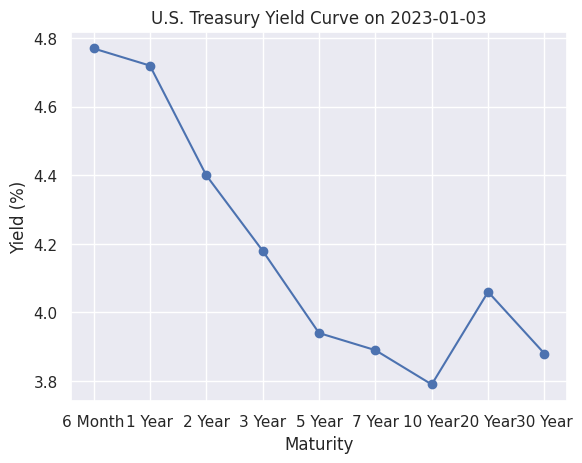

In [ ]:
yields.loc['2023-01-03'].plot(marker='o')
plt.title('U.S. Treasury Yield Curve on 2023-01-03')
plt.ylabel('Yield (%)')
plt.xlabel('Maturity')
plt.show()

##**Ploting the Yield**
It will create line graph of all yield values of all maturies over time.

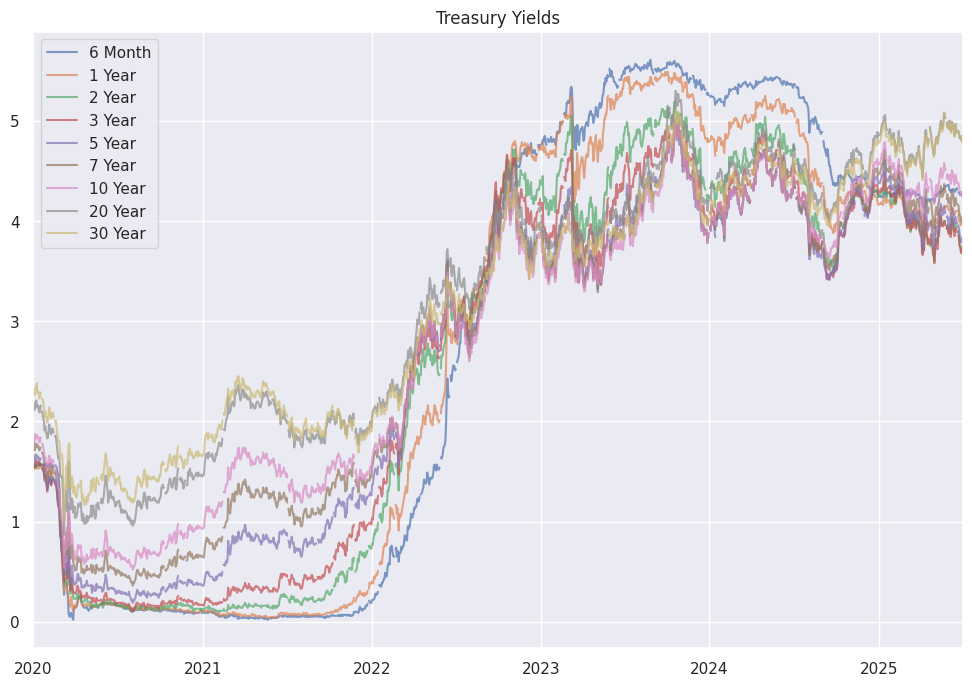

In [ ]:
# Figure 1
yields.plot(figsize=(12, 8), title='Treasury Yields', alpha=0.7) # Plot the yields
plt.show()

Figure 1 illustrate the historical behaviour of Treasury Yields for various maturities over selected period. This plot show how long-term and short-term interest rate evolved over time and shows the movement of yield cure due to market conditions or monetary policy shifts.

Figure 1 depicts the historical trend of tretury yield curve for multiple maturities from 2020 to 2025 From 2020 to 2022, yield remained near historical low due to accomodative monetary policy during COVID-19 pandemic. From 2022, all maturities yield curve surge sharply, reflecting aggrasive interest rate hikes by the FED to combat inflation. The yield curves show period of steepening and flattening and at time inversion, where short-term yields exceeded long-term yields, a potential signal of recession expectations. From 2023 to 2024, yields remained inflated but the spread between short-term and long-term narrowed, reflecting shifting market expectations about future interest rates.

##**Calculate Standard Deviations**
Using your yields DataFrame:

In [ ]:
yield_std = yields.std()  # Standard deviation across time for each maturity

** Plot the Result**

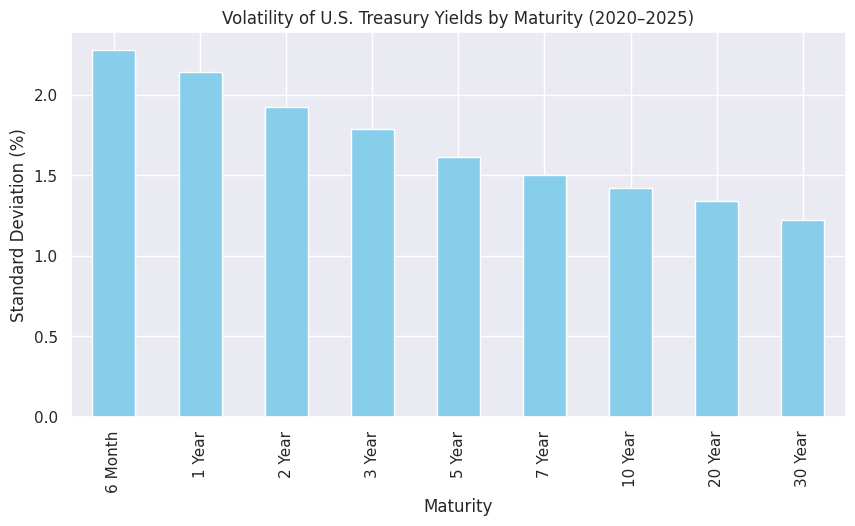

In [ ]:
yield_std.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Volatility of U.S. Treasury Yields by Maturity (2020–2025)')
plt.ylabel('Standard Deviation (%)')
plt.xlabel('Maturity')
plt.grid(True)
plt.show()

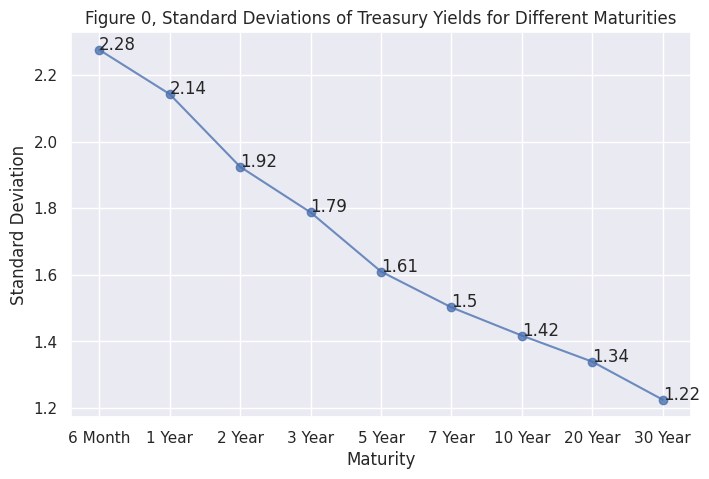

In [ ]:
fig, ax = plt.subplots()
yield_std.plot(figsize = (8,5),marker='o', title='Figure 0, Standard Deviations of Treasury Yields for Different Maturities', alpha=0.8) # Plot standard deviations of yields of different maturies
plt.xlabel("Maturity")
plt.ylabel("Standard Deviation")
for i in range(len(yield_std)):
    ax.annotate(str(round(yield_std.iloc[i],2)),xy=(i,yield_std.iloc[i]))
plt.show()

Short-term maturities (6M, 1Y) show higher standard deviations (2.28%, 2.14%) — meaning their interest rates are more volatile.

Long-term maturities (20Y, 30Y) are less volatile, with standard deviations falling to 1.34% and 1.22%, respectively.

This confirms that short-term rates react more quickly to economic and policy shifts, while long-term rates are steadier, often reflecting long-run expectations like inflation and growth.

##**Treasury Bond Price-Yield Curve**
**📌 What’s the Core Idea?**

There’s a fundamental inverse and non-linear relationship between bond prices and bond yields:

- When yields rise, the present value of future cash flows decreases, so bond prices fall.

- When yields fall, future payments are more valuable, so bond prices rise.

But it’s not linear – it’s curved (convex).
This is because:

- As yields decrease, bond prices increase at a faster rate.

- As yields increase, bond prices decrease at a slower rate.

This **curvature** is called **“bond convexity”** and is essential for understanding **duration risk**.

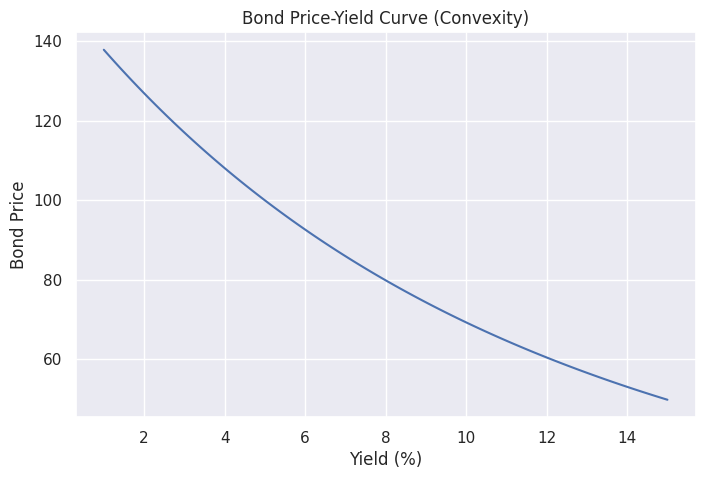

In [ ]:
# Assume a 10-year bond with a 5% coupon, face value = 100
import numpy as np

face_value = 100
coupon = 5
maturity = 10
yields = np.linspace(0.01, 0.15, 100)
prices = []

for y in yields:
    cash_flows = [(coupon / y) * (1 - (1 + y) ** -maturity) + face_value / ((1 + y) ** maturity)]
    prices.append(cash_flows[0])

plt.figure(figsize=(8,5))
plt.plot(yields * 100, prices)
plt.xlabel("Yield (%)")
plt.ylabel("Bond Price")
plt.title("Bond Price-Yield Curve (Convexity)")
plt.grid(True)
plt.show()

###**Curvature or Convexity in Bond Pricing**
###**What Is Convexity?**
Convexity refers to the curved nature of the bond price-yield relationship.

When yields are low, bond prices are highly sensitive to changes in yield.

When yields are high, bond prices change more slowly with further yield changes.

So, the effect isn’t linear — the bond price doesn't change by the same amount for each change in yield. This is where convexity comes into play.

Understanding convexity is crucial for:

- Portfolio management – To manage interest rate risk effectively.

- Bond trading – Traders use convexity to assess how prices will shift with yield changes.

- Hedging strategies – Helps in designing interest rate risk protection.

- Pricing models – **Convexity is embedded in accurate bond valuation formulas**.

- More convex = more responsive to rate changes.

- Ignoring convexity can lead to underestimating risk or mispricing bonds.

##**Polynomial Fitting for U.S. Treasury Yield Curve**

The yield curve shows how interest rates on government bonds vary with maturity (i.e., how long until they repay).
For example:

A 6-month bond might yield 2%

A 10-year bond might yield 3%

This relationship between yield and time to maturity is called the **Term Structure of Interest Rates**, more simply—the **yield curve**.


##**What’s Polynomial Fitting?**
In real data, the yield curve isn’t always a simple line, it can bend or twist depending on market conditions.

Polynomial fitting is a **mathematical way** to model this shape using curves:

We use a **polynomial function** (like a **cubic curve**) to fit the actual yields

This helps **smooth the curve** and spot trends more easily

Lays the foundation for comparing with other models (like** Nelson-Siegel** and **Cubic Spline**)

Figure 3


/tmp/ipython-input-26-3299173214.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


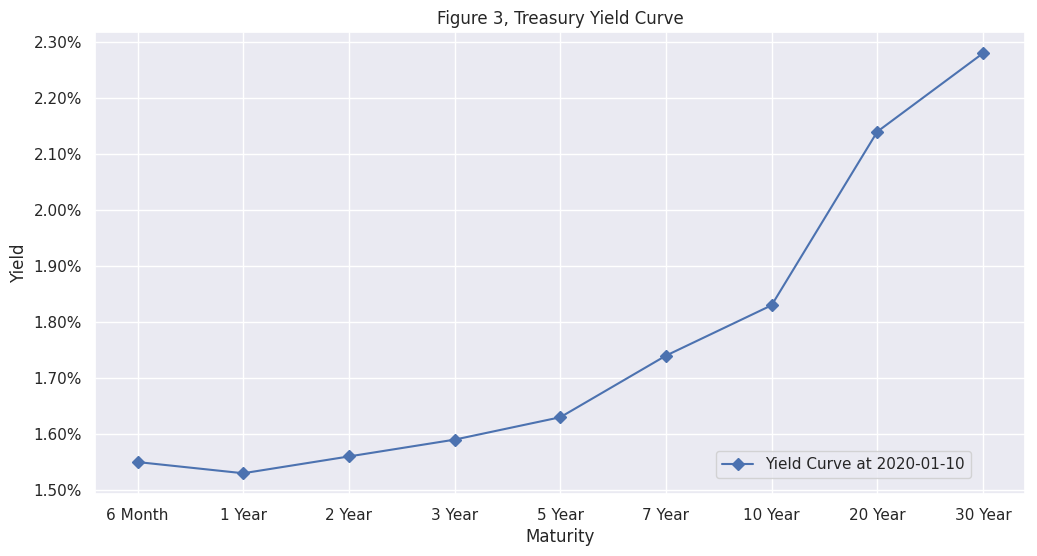

In [ ]:
# Assuming you've already used fred.get_series to create this dictionary:
# yields_dict = {'DGS6MO': ..., 'DGS1': ..., ..., 'DGS30': ...}

# Step 1: Combine into a DataFrame
yields = pd.DataFrame(yields_dict)

# Step 2: Set the index using one of the series (they all have the same index)
yields.index = yields_dict['DGS6MO'].index

# Step 3: (Optional) Convert index to string if comparing with string dates
yields.index = yields.index.strftime('%Y-%m-%d')

# Step 4: Define the plotting function
def plot_yield_curve(date, fig_n):
    maturities = ['6 Month', '1 Year', '2 Year', '3 Year', '5 Year',
                  '7 Year', '10 Year', '20 Year', '30 Year']

    yields_on_date = yields.loc[date]

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(maturities, yields_on_date, marker='D', label='Yield Curve at ' + date)

    # Format y-axis as percentage
    ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])

    # X ticks
    ax.set_xticks(range(len(maturities)))
    ax.set_xticklabels(maturities)

    # Labels and title
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Yield')
    ax.set_title(fig_n + 'Treasury Yield Curve')

    fig.legend(loc=[0.69, 0.14])
    plt.grid(True)
    plt.show()

# Step 5: Call the function with a specific date
print("Figure 3")
plot_yield_curve('2020-01-10', 'Figure 3, ')

#**Polynomial Fitting**
Polynomial fitting is one way to draw a smooth curve through yield data points. You can imagine using different degrees (like linear, quadratic, cubic) to fit more complex curves.

The higher the degree, the more the curve can bend to fit the data — but overfitting can become a problem.


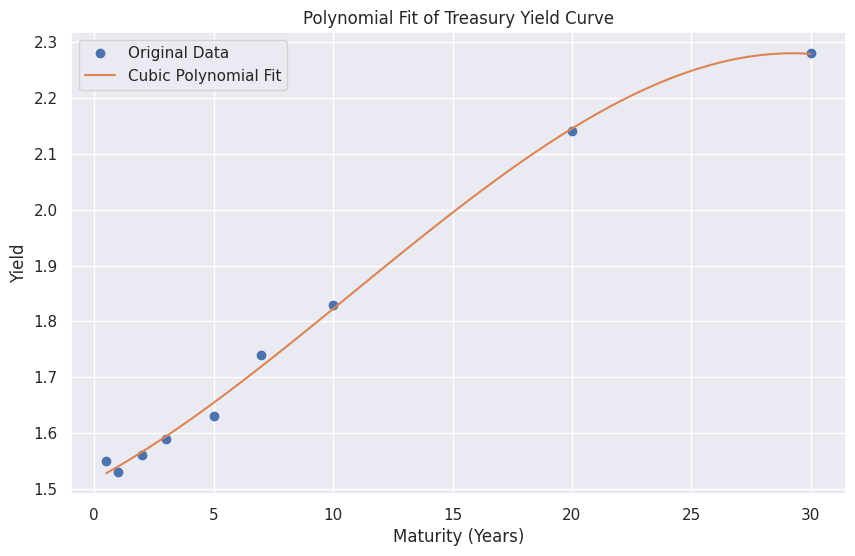

In [ ]:
# Step 1: Convert maturity labels to numbers (in years)
x_years = [0.5, 1, 2, 3, 5, 7, 10, 20, 30]  # Maturities in years
yields_on_date = yields.loc['2020-01-10'].values  # Yields for one date

# Step 2: Fit a cubic polynomial (degree = 3)
coeffs = np.polyfit(x_years, yields_on_date, deg=3)
poly_curve = np.poly1d(coeffs)

# Step 3: Create smooth x values and compute fitted yields
x_smooth = np.linspace(min(x_years), max(x_years), 100)
y_smooth = poly_curve(x_smooth)

# Step 4: Plot original data and fitted curve
plt.figure(figsize=(10, 6))
plt.plot(x_years, yields_on_date, 'o', label='Original Data')
plt.plot(x_smooth, y_smooth, label='Cubic Polynomial Fit')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield')
plt.title('Polynomial Fit of Treasury Yield Curve')
plt.legend()
plt.grid(True)
plt.show()

- The dots = Real Treasury yields

- The curve = Cubic polynomial that estimates how yields behave across maturities

#**Smart Fit: The Nelson-Siegel Model**
Instead of using just polynomials, professionals often use the Nelson-Siegel model (NS model). Why? Because it gives a flexible yet intuitive way to capture the shape of the yield curve with just a few parameters.

The Nelson-Siegel model is a **parametric model** that fits the yield curve using just **four parameters**, but it's smart enough to capture the full shape of the curve.

##**Why It's Better Than Plain Polynomials**
- Captures **real-world yield behaviors with fewer parameters**
- More **stable** than high-degree polynomials
- Parameters have **economic meaning**
- Used in practice by **central banks, traders, and economists**

In [ ]:
!pip install nelson_siegel_svensson

In [ ]:
# Import the packages for fitting NS model
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
import numpy as np

In [ ]:
# Create maturity and yield variables in array form
t = np.array([0.5,1,2,3,5,7,10,20,30])
y = np.array(yields.loc["2020-01-10"])

In [ ]:
print(np.isnan(y).sum())
print(y)


0
[1.55 1.53 1.56 1.59 1.63 1.74 1.83 2.14 2.28]


In [ ]:
print(yields.head(3))  # Show the first few rows
print(yields.index)    # Check the date format


            DGS6MO  DGS1  DGS2  DGS3  DGS5  DGS7  DGS10  DGS20  DGS30
2020-01-01     NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN
2020-01-02    1.57  1.56  1.58  1.59  1.67  1.79   1.88   2.19   2.33
2020-01-03    1.55  1.55  1.53  1.54  1.59  1.71   1.80   2.11   2.26
Index(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
       '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14',
       ...
       '2025-06-18', '2025-06-19', '2025-06-20', '2025-06-23', '2025-06-24',
       '2025-06-25', '2025-06-26', '2025-06-27', '2025-06-30', '2025-07-01'],
      dtype='object', length=1435)


In [ ]:
print("Available dates:", yields.index[:5])
print("Does 2020-01-01 exist?", "2020-01-10" in yields.index)


Available dates: Index(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07'], dtype='object')
Does 2020-01-01 exist? True


That means: No yield data was available on January 1, 2020 — likely because it was a public holiday (New Year's Day).

In [ ]:
# Fit an NS model for yields from 2020-01-10
curve, status = calibrate_ns_ols(t, y, tau0=0.5)  # starting value of 1.0 for the optimization of tau
assert status.success
print(curve)

NelsonSiegelCurve(beta0=np.float64(2.619461103488824), beta1=np.float64(-1.0718540389529012), beta2=np.float64(-1.1940976501431284), tau=np.float64(4.471545913227418))


- β₀ (Level): Long-term yield (~2.62%)

- β₁ (Slope): Short-term effect; negative → yields drop steeply at short maturities.

- β₂ (Curvature): Mid-term hump/dip effect; negative here means a mid-term dip.

- τ (Tau): Controls where the curvature (hump) happens on the maturity curve.

**Now let's plot the graph to better understand the model result.**

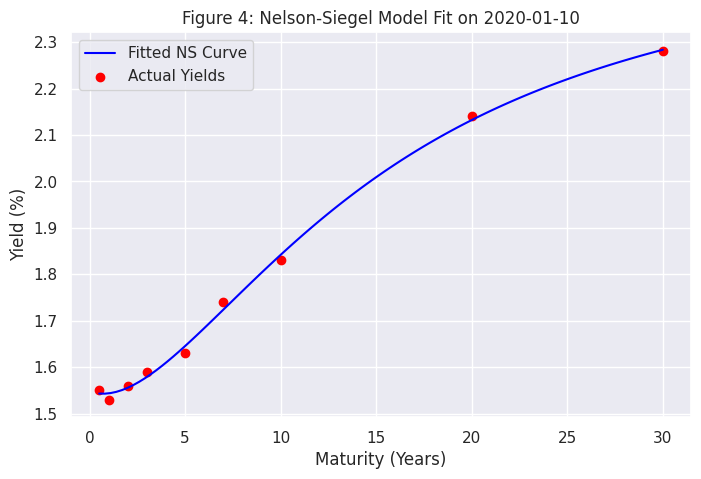

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Reuse your fitted curve
y_hat = curve  # This is already a callable function

# Create a smooth range of maturities from 0.5 to 30 years
t_hat = np.linspace(0.5, 30, 100)

# Plot the NS curve
plt.figure(figsize=(8, 5))
plt.plot(t_hat, y_hat(t_hat), label="Fitted NS Curve", color='blue')

# Optional: plot actual data for comparison
plt.scatter(t, y, color='red', label="Actual Yields")

# Add labels and title
plt.xlabel("Maturity (Years)")
plt.ylabel("Yield (%)")
plt.title("Figure 4: Nelson-Siegel Model Fit on 2020-01-10")
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Figure 4, NS Model Result')

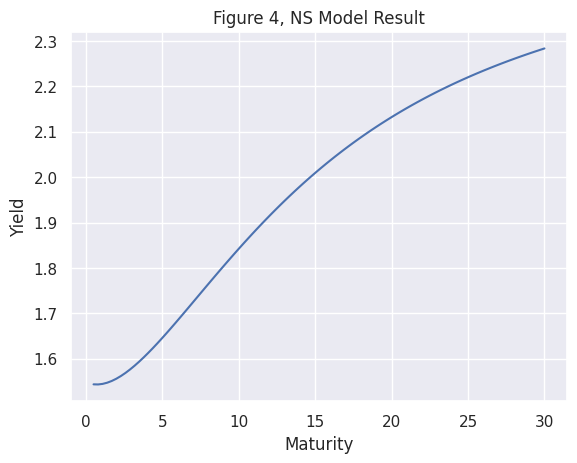

In [ ]:
y_hat = curve
t_hat = np.linspace(0.5,30,100)
plt.plot(t_hat, y_hat(t_hat))
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Figure 4, NS Model Result")

**The upward shape reflects:**

- Long-term yield expectation (β₀ ≈ 2.6)

- A short-term dip (β₁ and β₂ are negative)

- Moderate curvature controlled by τ ≈ 4.5


Let’s walk through the updated process using a new date:
**Extract the Yields**

In [ ]:
new_date = "2022-10-03"  # change as needed
y_new = np.array(yields.loc[new_date])


**Remove NaNs (if needed)**

In [ ]:
mask = ~np.isnan(y_new)
t_new = t[mask]
y_new = y_new[mask]


In [ ]:
curve_new, status = calibrate_ns_ols(t_new, y_new, tau0=1.0)
assert status.success
print(curve_new)


NelsonSiegelCurve(beta0=np.float64(3.7312249405056033), beta1=np.float64(-0.11152321831014211), beta2=np.float64(1.4008082261155914), tau=np.float64(0.7738006536247108))


Plot It

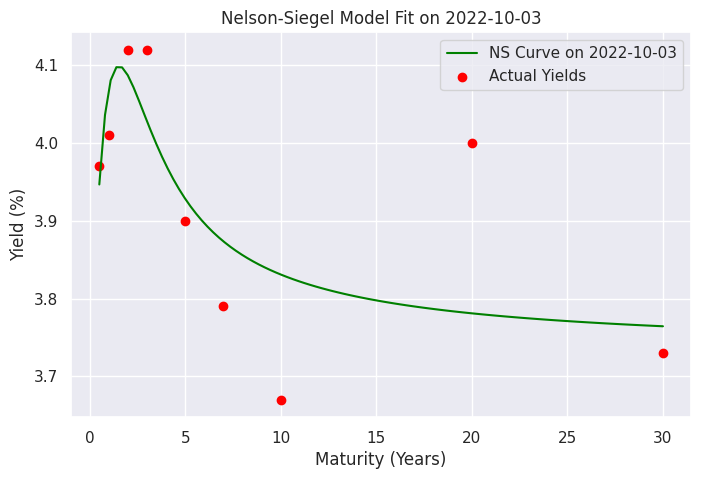

In [ ]:
t_hat = np.linspace(0.5, 30, 100)
plt.figure(figsize=(8, 5))
plt.plot(t_hat, curve_new(t_hat), label=f"NS Curve on {new_date}", color='green')
plt.scatter(t_new, y_new, color='red', label="Actual Yields")
plt.xlabel("Maturity (Years)")
plt.ylabel("Yield (%)")
plt.title(f"Nelson-Siegel Model Fit on {new_date}")
plt.legend()
plt.grid(True)
plt.show()


- The yield curve has a hump, rising initially, peaking around 2–3 years, then declining.

- 🟢 The NS model curve (green) clearly picked up that humped shape.

- 🔴 The actual yields (red dots) match quite well, especially at short and mid maturities.

Nelson-Siegel model adapted well to the curve shift and captured the structure effectively

#**Cubic Spline Fitting of the Yield Curve**

A cubic spline is a series of third-degree (cubic) polynomials pieced together so that:

The function is smooth.

It passes exactly through all data points.

The first and second derivatives are continuous at the “knots” (data points).

Think of it as drawing a curve through your yield points with a flexible ruler — not too wiggly, not too stiff.

Handles irregular or **volatile** shapes better than fixed-form models like Nelson-Siegel.

**Doesn't assume any economic theory**, purely data-driven.

Great for **interpolation** when you trust the actual data points.

#**🧠 Why Use Spline Instead of Polynomial?**
###**The Problem with High-Degree Polynomials:**

**Wild Oscillations:** When you fit a single high-degree polynomial to a set of points, it often creates unrealistic wiggles between those points, especially near the ends (called **Runge’s phenomenon**).


**Overfitting**: A single high-degree curve tries too hard to match every data point, resulting in a model that's too sensitive to small changes.

**The Power of Splines:**

Smooth and Local: A spline fits multiple low-degree polynomials (usually cubic) between each pair of points.

Continuity: It ensures smooth first and second derivatives (slopes and curvature) at the points where the pieces connect.

Stability: Changes in one part of the data don’t dramatically affect the rest of the curve.

**Why Splines Are Ideal for Yield Curves:**

Bond yields change gradually across maturities.

A spline provides a realistic and smooth curve that reflects this steady behavior.

It avoids sharp kinks or spikes that would be unrealistic for interest rates.

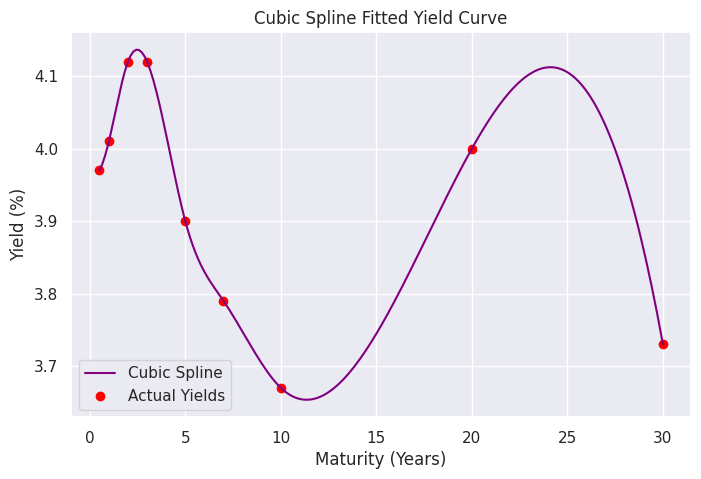

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Your data
t = np.array([0.5, 1, 2, 3, 5, 7, 10, 20, 30])              # Maturities
y = np.array(yields.loc["2022-10-03"])                      # Replace with your date

# Remove NaNs
mask = ~np.isnan(y)
t_clean = t[mask]
y_clean = y[mask]

# Fit cubic spline
spline = make_interp_spline(t_clean, y_clean, k=3)

# Generate smooth curve
t_smooth = np.linspace(t_clean.min(), t_clean.max(), 200)
y_smooth = spline(t_smooth)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(t_smooth, y_smooth, label="Cubic Spline", color='purple')
plt.scatter(t_clean, y_clean, color='red', label="Actual Yields")
plt.xlabel("Maturity (Years)")
plt.ylabel("Yield (%)")
plt.title("Cubic Spline Fitted Yield Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
yields.columns = ['6 Month', '1 Year', '2 Year', '3 Year', '5 Year', '7 Year', '10 Year', '20 Year', '30 Year']
yields.loc["2020-01-10"]

,2020-01-10
6 Month,1.55
1 Year,1.53
2 Year,1.56
3 Year,1.59
5 Year,1.63
7 Year,1.74
10 Year,1.83
20 Year,2.14
30 Year,2.28


**Let's define our maturity variable and yield variable as array forms.**

In [ ]:
t = np.array([0.5, 1, 2, 3, 5, 7, 10, 20, 30])
y = np.array([1.55, 1.53, 1.56, 1.59, 1.63, 1.74, 1.83, 2.14, 2.28])

working through the manual construction of a cubic spline, just like in numerical analysis or linear algebra

We have:
- 9 data points, which means:

- 8 spline segments, and

- 32 unknowns (4 coefficients × 8 splines)

We'd need:

- 8 × 2 = 16 equations (for start and end of each spline)

- 7 equations for continuity of first derivative

- 7 equations for continuity of second derivative

- 2 natural boundary conditions (second derivative = 0 at endpoints)

That means:

**We must solve a 32×32 linear system**.

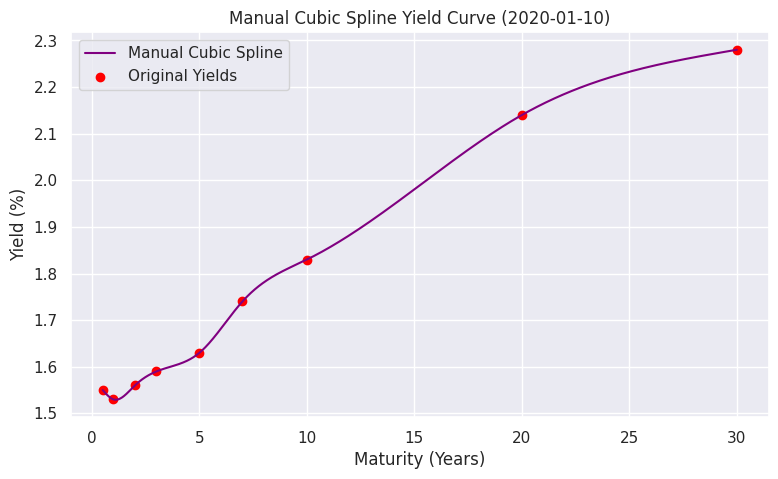

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
t = np.array([0.5, 1, 2, 3, 5, 7, 10, 20, 30])
y = np.array([1.55, 1.53, 1.56, 1.59, 1.63, 1.74, 1.83, 2.14, 2.28])
n = len(t) - 1  # 8 segments → 8 cubic splines
N = 4 * n       # 32 unknowns

A = np.zeros((N, N))
out = np.zeros(N)
row = 0

# 1. Spline matches the values at interval endpoints
for i in range(n):
    x0, x1 = t[i], t[i+1]

    A[row, 4*i:4*i+4] = [x0**3, x0**2, x0, 1]
    out[row] = y[i]
    row += 1

    A[row, 4*i:4*i+4] = [x1**3, x1**2, x1, 1]
    out[row] = y[i+1]
    row += 1

# 2. First derivative continuity: S_i'(x1) = S_{i+1}'(x1)
for i in range(n - 1):
    x = t[i+1]
    A[row, 4*i:4*i+3] = [3*x**2, 2*x, 1]
    A[row, 4*(i+1):4*(i+1)+3] = [-3*x**2, -2*x, -1]
    row += 1

# 3. Second derivative continuity: S_i''(x1) = S_{i+1}''(x1)
for i in range(n - 1):
    x = t[i+1]
    A[row, 4*i:4*i+2] = [6*x, 2]
    A[row, 4*(i+1):4*(i+1)+2] = [-6*x, -2]
    row += 1

# 4. Natural spline boundary conditions
x_start = t[0]
x_end = t[-1]
A[row, 0:2] = [6*x_start, 2]
row += 1
A[row, -4:-2] = [6*x_end, 2]
row += 1

# Solve and reshape
coeffs = np.linalg.solve(A, out)
lines = coeffs.reshape(-1, 4)

# Piecewise spline evaluation function
def eval_spline(xs, coeffs):
    return np.sum(np.column_stack([
        coeffs[0]*xs**3,
        coeffs[1]*xs**2,
        coeffs[2]*xs,
        coeffs[3]*np.ones_like(xs)
    ]), axis=1)

# Generate and plot smooth segments
xs = np.array([])
ys = np.array([])

for i in range(n):
    x_segment = np.linspace(t[i], t[i+1], 100)
    y_segment = eval_spline(x_segment, lines[i])
    xs = np.concatenate((xs, x_segment))
    ys = np.concatenate((ys, y_segment))

# Plot the result
plt.figure(figsize=(9, 5))
plt.plot(xs, ys, label="Manual Cubic Spline", color='purple')
plt.scatter(t, y, color='red', label="Original Yields")
plt.xlabel("Maturity (Years)")
plt.ylabel("Yield (%)")
plt.title("Manual Cubic Spline Yield Curve (2020-01-10)")
plt.grid(True)
plt.legend()
plt.show()


Manually builds and solves a 32×32 spline system

Constructs each spline's coefficients

Evaluates and plots each spline segment from 0.5 to 30 years

Red dots: Actual yield data from 2020-01-10

Smooth purple curve: Your manually calculated 8-piece cubic spline fit

It captures:

The short-term dip (between 0.5 and 1 year)

The mid-term rise (5 to 10 years)

The long-term leveling-off (20 to 30 years)

Once we build this yield curve, we can use this curve to obtain discount factors for any future cash flows.

Summing all the discounted future cash flows from an asset, we can get the present value of the asset and evaluate whether the current price is overvaluing or undervaluing the asset.

In [ ]:
def discount_factor(yield_value, t):
    return np.exp(-yield_value * t / 100)

# Example: use your fitted spline to estimate yields
cash_flows = [5, 5, 105]
times = [1, 2, 3]
yields_at_times = eval_spline(np.array(times), lines[0])  # adjust to correct spline

# Compute PV
pvs = [cf * discount_factor(y, t) for cf, y, t in zip(cash_flows, yields_at_times, times)]
PV_total = sum(pvs)
print("Present Value of the asset:", PV_total)


Present Value of the asset: 108.03823160113869


##**scipy Approch**
Now let’s do this using **scipy**, which handles cubic spline fitting automatically and makes discounting super clean.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


In [ ]:
# Your data
t = np.array([0.5, 1, 2, 3, 5, 7, 10, 20, 30])
y = np.array([1.55, 1.53, 1.56, 1.59, 1.63, 1.74, 1.83, 2.14, 2.28])

# 1. Fit cubic spline to yield curve
spline = make_interp_spline(t, y, k=3)

# 2. Define cash flows (example: bond-like structure)
cash_flows = [5, 5, 105]
times = [1, 2, 3]

# 3. Evaluate yields using spline
yields_at_times = spline(times)

# 4. Compute discount factors
def discount_factor(yield_value, t):
    return np.exp(-yield_value * t / 100)

dfs = [discount_factor(y, t) for y, t in zip(yields_at_times, times)]

# 5. Calculate present value
pvs = [cf * df for cf, df in zip(cash_flows, dfs)]
PV_total = sum(pvs)

print("Yields at times:", yields_at_times)
print("Discount Factors:", dfs)
print("Present Value of the asset:", round(PV_total, 2))


Yields at times: [1.53 1.56 1.59]
Discount Factors: [np.float64(0.9848164503467863), np.float64(0.9692816973496297), np.float64(0.9534197701089379)]
Present Value of the asset: 109.88


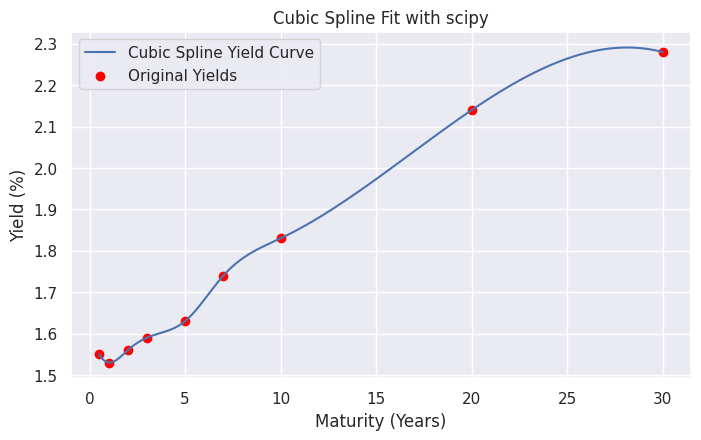

In [ ]:
x_plot = np.linspace(0.5, 30, 300)
y_plot = spline(x_plot)

plt.figure(figsize=(8, 4.5))
plt.plot(x_plot, y_plot, label="Cubic Spline Yield Curve")
plt.scatter(t, y, color='red', label="Original Yields")
plt.xlabel("Maturity (Years)")
plt.ylabel("Yield (%)")
plt.title("Cubic Spline Fit with scipy")
plt.legend()
plt.grid(True)
plt.show()


#**Fit Comparison: Cubic Spline vs. Nelson-Siegel**

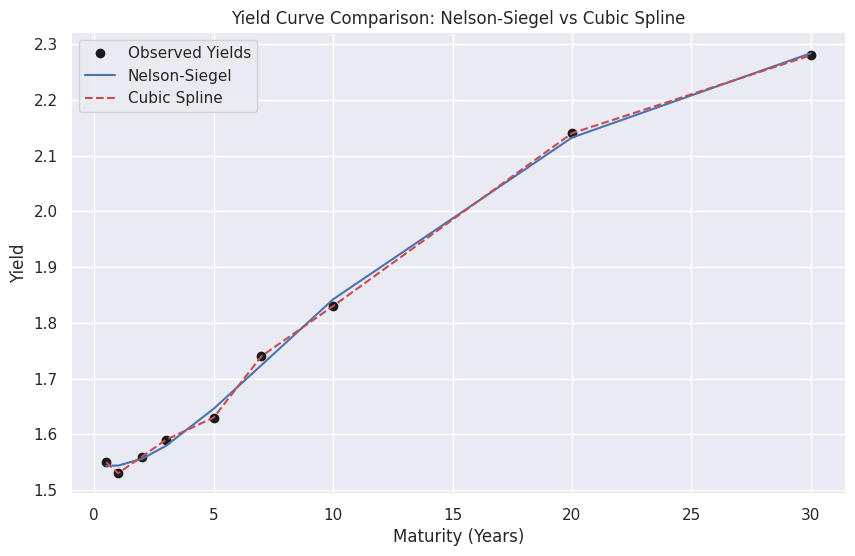

In [ ]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# Step 1: Fit the Cubic Spline model
# Use 't' for maturities and 'y' for yields from the previous cells
cs_model = CubicSpline(t, y)

# Step 2: Generate yields using the Cubic Spline
cs_yields = cs_model(t)

# Step 3: Plot observed data, Nelson-Siegel, and Cubic Spline
plt.figure(figsize=(10, 6))
plt.plot(t, y, 'ko', label='Observed Yields')         # Black dots
plt.plot(t, curve(t), 'b-', label='Nelson-Siegel')        # Blue line # Use 'curve(t)' for NS yields
plt.plot(t, cs_yields, 'r--', label='Cubic Spline')        # Red dashed line

plt.title('Yield Curve Comparison: Nelson-Siegel vs Cubic Spline')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield')
plt.legend()
plt.grid(True)
plt.show()

The plot above compares how well two methods,Nelson-Siegel and Cubic Spline—fit observed U.S. Treasury yields across various maturities.

Both models do a good job of fitting the yield curve, especially for medium to long maturities (10–30 years).

In the short maturity range (1–10 years), the Cubic Spline shows slight wiggles,a sign of overfitting due to its flexible nature.

The Nelson-Siegel model produces a smoother and more stable curve, which is often preferred for its economic interpretability (level, slope, curvature factors).

If the goal is perfect fit to observed data, the Cubic Spline may perform better locally.

If the goal is a robust, interpretable model for forecasting or scenario analysis, Nelson-Siegel is typically preferred.

This plot visually confirms the trade-off between the two approaches:

Cubic Spline is more flexible and fits the data closely but may not generalize well.

Nelson-Siegel is more structured and smooth, making it better suited for modeling and analysis.

#**Ethics of Smoothing Data in Financial Reporting**
In financial data analysis, smoothing refers to making a time series appear less volatile or “bumpy.” While this can be beneficial in academic or forecasting contexts,helping identify long-term trends by removing short-term noise—it becomes problematic when used in profit-and-loss (P&L) reporting to intentionally mislead investors.

**No, using the Nelson-Siegel model to smooth the yield curve is not considered unethical**

**Why Nelson-Siegel Is Ethical Yield Curve Smoothing**

Nelson-Siegel is a parametric model used to fit a smooth yield curve across different maturities. It was specifically designed to:

Provide a clean, continuous curve using a small number of parameters

Capture the level, slope, and curvature of interest rates

Help with forecasting, risk management, and pricing financial instruments

This type of smoothing is transparent, mathematically defined, and openly disclosed in academic and financial literature.

From the ethical lesson you read, smoothing becomes unethical when:

It is used to hide real volatility (e.g., in P&L reports)

It misleads stakeholders about the true risk of an investment

It lacks disclosure, or is used to manipulate metrics like the Sharpe ratio

For example, if a fund manager manipulates return data to appear more stable,without disclosing it—that’s misleading and unethical.

***Ethical practice depends on how and why smoothing is applied,not just the technique itself.***